### MLT-2024 Task #3
1.	Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule 

data: bioresponse.csv

description from Kaggle: 
“The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”). 

Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.

2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method and Adam optimization method using the numpy library. Apply them to solve the problem from p.1.

3.	For three modifications of gradient descent (GD, SGD and Adam) plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 

4.	Compare the accuracy of the models fitted with various BP algorithms.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from typing import Tuple

from sklearn.model_selection import train_test_split

from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
class Method:
    def sigmoid(self, z):
        """
        Compute the sigmoid of z
    
        Arguments:
        z -- A scalar or numpy array of any size.
    
        Return:
        s -- sigmoid(z)
        """
        s = 1./(1. + np.exp(-z))
    
        return s

    def initialize_with_zeros(self, dim: int) -> Tuple[np.ndarray, float]:
        """
        This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
        Argument:
        dim -- size of the w vector we want (or number of parameters in this case)
    
        Returns:
        w -- initialized vector of shape (dim, 1)
        b -- initialized scalar (corresponds to the bias)
        """
        w = np.zeros((dim, 1))
        b = 0.
    
        return w, b

    def optimize(self, w: np.ndarray, b: float, X, Y, num_iterations: int, learning_rate: float, print_cost: bool = False):
        pass

    def predict(self, w, b, X):
        '''
        Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
        Arguments:
        w -- weights, a numpy array
        b -- bias, a scalar
        X -- data
    
        Returns:
        Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
        '''
    
        m = X.shape[1]
        Y_prediction = np.zeros((1, m))
        w = w.reshape(X.shape[0], 1)
    
        # Compute vector "A" predicting the probabilities
        A = self.sigmoid(np.dot(w.T, X) + b)
    
        for i in range(A.shape[1]):
    
            # Convert probabilities A[0,i] to actual predictions p[0,i]
            if (A[0, i] <= 0.5):
                Y_prediction[0][i]=0
            else:
                Y_prediction[0][i]=1
    
        return Y_prediction

    def propagate(self, w, b, X, Y):
        """
        Implement the cost function and its gradient for the propagation explained above
    
        Arguments:
        w -- weights, a numpy array of size which equals the number of features
        b -- bias, a scalar
        X -- data
        Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)
    
        Return:
        cost -- negative log-likelihood cost for logistic regression
        dw -- gradient of the loss with respect to w, thus same shape as w
        db -- gradient of the loss with respect to b, thus same shape as b
    
        """
        m = X.shape[1]

        # FORWARD PROPAGATION (FROM X TO COST)
        A = self.sigmoid(np.dot(w.T, X) + b)
        cost = -(1./m) * np.sum(Y*np.log(A) + (1 - Y)*np.log(1 - A), axis=1)   # compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        dw = (1./m) * np.dot(X, (A - Y).T)
        db = (1./m) * np.sum(A - Y, axis=1)
    
        grads = {
            "dw": dw,
            "db": db
        }
    
        return grads, cost

    def model(self, X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
        """
        Builds the logistic regression model by calling the function we've implemented previously
    
        Arguments:
        X_train -- training set represented by a numpy array
        Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
        X_test -- test set represented by a numpy array
        Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
        num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
        learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
        print_cost -- Set to true to print the cost every 100 iterations
    
        Returns:
        d -- dictionary containing information about the model.
        """
    
        # initialize parameters with zeros
        w, b = self.initialize_with_zeros(X_train.shape[0])
        
        # Gradient descent
        parameters, grads, costs = self.optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
        # Retrieve parameters w and b from dictionary "parameters"
        w = parameters["w"]
        b = parameters["b"]
    
        # Predict test/train set examples
        Y_prediction_test = self.predict(w, b, X_test)
        Y_prediction_train = self.predict(w, b, X_train)
    
        train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
        test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
        print(f"train accuracy: {train_accuracy} %")
        print(f"test accuracy: {train_accuracy} %")
    
        d = {
            "costs": costs,
            "Y_prediction_test": Y_prediction_test,
            "Y_prediction_train" : Y_prediction_train,
            "w" : w,
            "b" : b,
            "learning_rate" : learning_rate,
            "num_iterations": num_iterations,
            "train_accuracy": train_accuracy,
            "test_accuracy": test_accuracy,
        }
    
        return d

In [4]:
class GD(Method):
    def optimize(self, w: np.ndarray, b: float, X, Y, num_iterations: int, learning_rate: float, print_cost: bool = False):
        """
        This function optimizes w and b by running a gradient descent algorithm
    
        Arguments:
        w -- weights, a numpy array
        b -- bias, a scalar
        X -- data
        Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
        num_iterations -- number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent update rule
        print_cost -- True to print the loss every 100 steps
    
        Returns:
        params -- dictionary containing the weights w and bias b
        grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
        costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
        """
    
        costs = []

        for i in range(num_iterations):
            # Cost and gradient calculation
            grads, cost = self.propagate(w, b, X, Y)
    
            # Retrieve derivatives from grads
            dw = grads["dw"]
            db = grads["db"]
    
            # update rule
            w -= learning_rate * dw
            b -= learning_rate * db
    
            if i % 10 == 0:
                costs.append(cost)
    
            # Print the cost every 100 training iterations
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
    
        params = {
            "w": w,
            "b": b
        }
    
        grads = {
            "dw": dw,
            "db": db
        }
    
        return params, grads, costs

In [5]:
class SGD(Method):
    def optimize(self, w: np.ndarray, b: float, X, y, num_iterations: int, learning_rate: float, print_cost: bool = False):
        """
        This function optimizes w and b by running a gradient descent algorithm
    
        Arguments:
        w -- weights, a numpy array
        b -- bias, a scalar
        X -- data
        y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
        num_iterations -- number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent update rule
        print_cost -- True to print the loss every 100 steps
    
        Returns:
        params -- dictionary containing the weights w and bias b
        grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
        costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
        """
    
        costs = []
        BATCH_SIZE = 128

        n_samples = X.shape[1]
    
        for i in range(num_iterations):
            for j in range(0, n_samples, BATCH_SIZE):
                X_batch = X.iloc[:, j: j + BATCH_SIZE]
                y_batch = y[:, j: j + BATCH_SIZE]

                # Cost and gradient calculation
                grads, cost = self.propagate(w, b, X_batch, y_batch)

                # Retrieve derivatives from grads
                dw = grads["dw"]
                db = grads["db"]

                # update rule
                w -= learning_rate * dw
                b -= learning_rate * db
    
            if i % 10 == 0:
                costs.append(cost)
    
            # Print the cost every 100 training iterations
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
    
        params = {
            "w": w,
            "b": b
        }
    
        grads = {
            "dw": dw,
            "db": db
        }
    
        return params, grads, costs

In [6]:
class Adam(Method):
    def optimize(self, w: np.ndarray, b: float, X, y, num_iterations: int, learning_rate: float, print_cost: bool = False):
        """
        This function optimizes w and b by running a gradient descent algorithm
    
        Arguments:
        w -- weights, a numpy array
        b -- bias, a scalar
        X -- data
        Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
        num_iterations -- number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent update rule
        print_cost -- True to print the loss every 100 steps
    
        Returns:
        params -- dictionary containing the weights w and bias b
        grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
        costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
        """
        beta1, beta2 = 0.9, 0.999
        epsilon = 1e-7
        costs = []
        sb, sw = 0, 0
        vb, vw = 0, 0
    
        for i in range(num_iterations):
            
            # Cost and gradient calculation
            grads, cost = self.propagate(w, b, X, y)
    
            # Retrieve derivatives from grads
            dw = grads["dw"]
            db = grads["db"]

            sw = beta1 * sw + (1.0 - beta1) * dw
            sb = beta1 * sb + (1.0 - beta1) * db
            
            vw = beta2 * vw + (1.0 - beta2) * dw ** 2
            vb = beta2 * vb + (1.0 - beta2) * db ** 2          
            
            s_hat_w = sw / (1.0 - beta1 ** (i + 1))
            s_hat_b = sb / (1.0 - beta1 ** (i + 1))
            
            v_hat_w = vw / (1.0 - beta2 ** (i + 1))
            v_hat_b = vb / (1.0 - beta2 ** (i + 1))
            
            # x = x - learning_rate * s_hat / (np.sqrt(v_hat) + epsilon)
    
            # update rule
            w = w - learning_rate * s_hat_w / (np.sqrt(v_hat_w) + epsilon)
            b = b - learning_rate * s_hat_b / (np.sqrt(v_hat_b) + epsilon)
    
            # Record the costs
            if i % 10 == 0:
                costs.append(cost)
    
            # Print the cost every 100 training iterations
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
    
        params = {"w": w,
                  "b": b}
    
        grads = {"dw": dw,
                 "db": db}
    
        return params, grads, costs

# PART 1

In [7]:
df = pd.read_csv('bioresponse.csv')
X = df.iloc[:, 1:]
y = df.Activity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
y_train = y_train.to_numpy().reshape(1,  -1)
y_test = y_test.to_numpy().reshape(1,  -1)

In [8]:
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

# Warning!
## The execution of the next cell will take about 10 minutes. You can see remain time after the first iteration.

In [9]:
gd_models, sgd_models, adam_models = [], [], []
for learning_rate in tqdm(learning_rates):
    model_gd = GD()
    model_gd = model_gd.model(X_train.T, y_train, X_test.T, y_test, print_cost=False, learning_rate=learning_rate)
    gd_models.append(model_gd)
    model_sgd = SGD()
    model_sgd = model_sgd.model(X_train.T, y_train, X_test.T, y_test, print_cost=False, learning_rate=learning_rate)
    sgd_models.append(model_sgd)
    model_adam = Adam()
    model_adam = model_adam.model(X_train.T, y_train, X_test.T, y_test, print_cost=False, learning_rate=learning_rate)
    adam_models.append(model_adam)

  0%|          | 0/7 [00:00<?, ?it/s]

train accuracy: 55.31461073586918 %
test accuracy: 55.31461073586918 %
train accuracy: 75.22218272307146 %
test accuracy: 75.22218272307146 %


 14%|█▍        | 1/7 [01:17<07:44, 77.44s/it]

train accuracy: 82.47422680412372 %
test accuracy: 82.47422680412372 %
train accuracy: 68.9655172413793 %
test accuracy: 68.9655172413793 %
train accuracy: 79.3103448275862 %
test accuracy: 79.3103448275862 %


 29%|██▊       | 2/7 [02:40<06:44, 80.94s/it]

train accuracy: 88.62424457874155 %
test accuracy: 88.62424457874155 %
train accuracy: 73.16032705296836 %
test accuracy: 73.16032705296836 %
train accuracy: 80.94560966939211 %
test accuracy: 80.94560966939211 %


 43%|████▎     | 3/7 [03:57<05:16, 79.05s/it]

train accuracy: 90.47280483469605 %
test accuracy: 90.47280483469605 %
train accuracy: 77.07074297902595 %
test accuracy: 77.07074297902595 %
train accuracy: 84.28723782438678 %
test accuracy: 84.28723782438678 %


 57%|█████▋    | 4/7 [05:18<03:59, 79.71s/it]

train accuracy: 93.672236046925 %
test accuracy: 93.672236046925 %
train accuracy: 78.99040170636331 %
test accuracy: 78.99040170636331 %
train accuracy: 85.70920725204408 %
test accuracy: 85.70920725204408 %


 71%|███████▏  | 5/7 [06:37<02:38, 79.48s/it]

train accuracy: 94.24102381798791 %
test accuracy: 94.24102381798791 %
train accuracy: 82.29648062566655 %
test accuracy: 82.29648062566655 %
train accuracy: 88.94418769996446 %
test accuracy: 88.94418769996446 %


 86%|████████▌ | 6/7 [07:58<01:20, 80.06s/it]

train accuracy: 95.52079630287949 %
test accuracy: 95.52079630287949 %
train accuracy: 84.18059011731248 %
test accuracy: 84.18059011731248 %
train accuracy: 90.2950586562389 %
test accuracy: 90.2950586562389 %


100%|██████████| 7/7 [09:19<00:00, 79.94s/it]

train accuracy: 96.16068254532527 %
test accuracy: 96.16068254532527 %


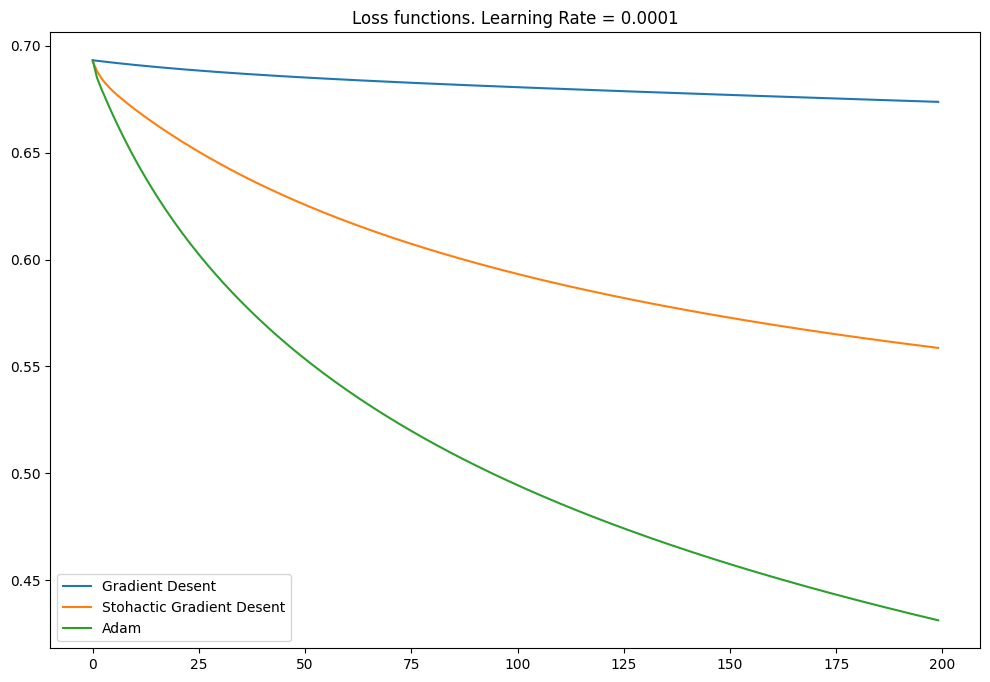

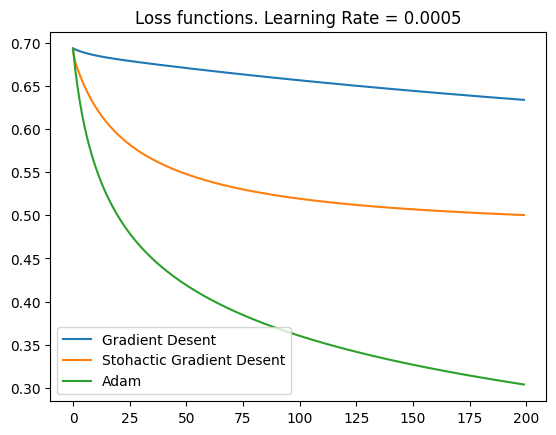

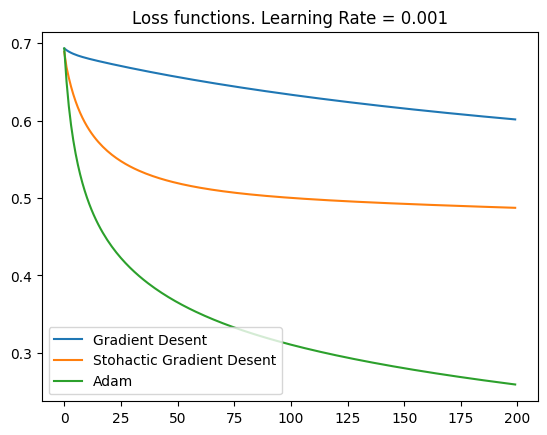

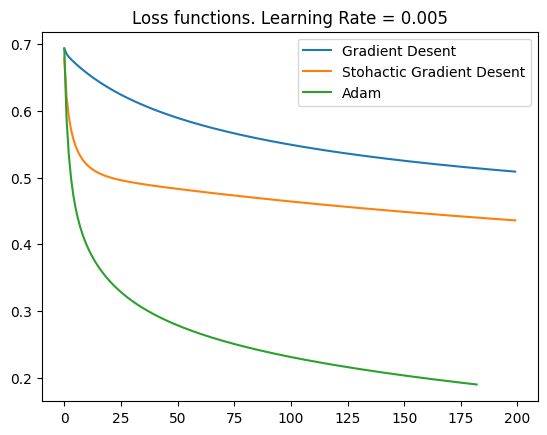

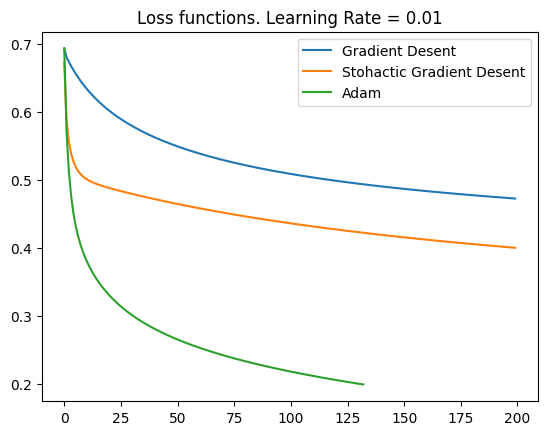

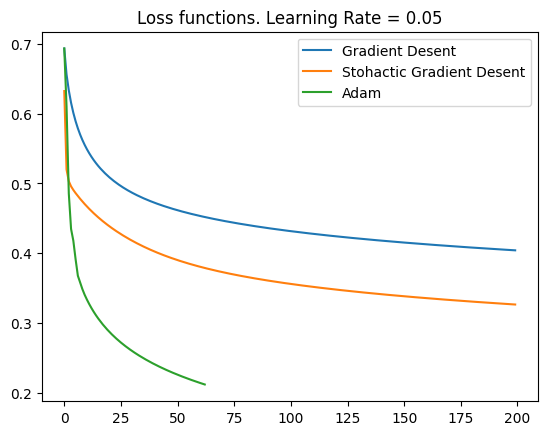

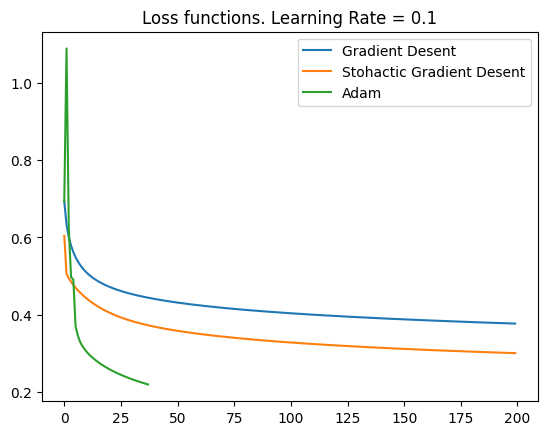

In [10]:
# figure, axis = plt.subplots(4, 2)
plt.figure(figsize=(12, 8)) 
for i, (gd_model, sgd_model, adam_model) in enumerate(zip(gd_models, sgd_models, adam_models)):
    plt.title(f'Loss functions. Learning Rate = {learning_rates[i]}')
    plt.plot(gd_model['costs'], label='Gradient Desent')
    plt.plot(sgd_model['costs'], label='Stohactic Gradient Desent')
    plt.plot(adam_model['costs'], label='Adam')
    plt.legend()
    plt.show()

The plots show us, that AdamOptimizer is the best for the all learning rates.
As learning rate increases, the loss function decreases. But if learning rate would be large, loss function would be increase.

In [11]:
acc_gd = [gd_model['test_accuracy'] for gd_model in gd_models]
acc_sgd = [sgd_model['test_accuracy'] for sgd_model in sgd_models]
acc_adam = [adam_model['test_accuracy'] for adam_model in adam_models]

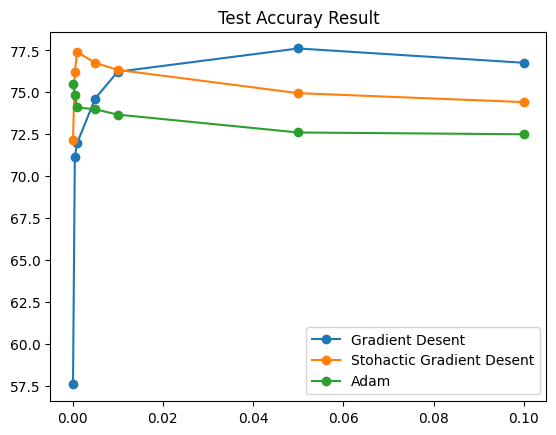

In [12]:
# figure, axis = plt.subplots(4, 2)
plt.title('Test Accuray Result')
plt.plot(learning_rates, acc_gd, marker='o', label='Gradient Desent')
plt.plot(learning_rates, acc_sgd, marker='o', label='Stohactic Gradient Desent')
plt.plot(learning_rates, acc_adam, marker='o', label='Adam')
plt.legend()
plt.show()

It is strange that AdamOptimizer is worse than others. I can guess that a reason for that is a necessity to add Regularizations for example using weight_decay in AdamOptimizer. Generally we should more carefully use optimizer and find best hyperparameters.

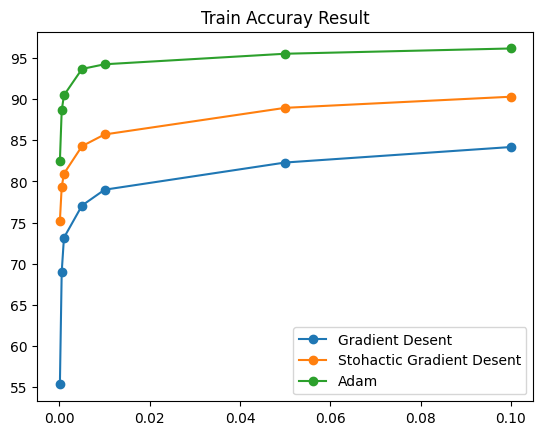

In [13]:
acc_gd = [gd_model['train_accuracy'] for gd_model in gd_models]
acc_sgd = [sgd_model['train_accuracy'] for sgd_model in sgd_models]
acc_adam = [adam_model['train_accuracy'] for adam_model in adam_models]

# figure, axis = plt.subplots(4, 2)
plt.title('Train Accuray Result')
plt.plot(learning_rates, acc_gd, marker='o', label='Gradient Desent')
plt.plot(learning_rates, acc_sgd, marker='o', label='Stohactic Gradient Desent')
plt.plot(learning_rates, acc_adam, marker='o', label='Adam')
plt.legend()
plt.show()

This is correct and in accordance with the theory.